# Create a Machine Learning Prototype For Zyfra Company

# Content <a id='contents'></a>

* [0 Overview](#big_picture)
    * [0.1 Introduction](#intro)
    * [0.2 Data Descrition](#data_description)
    * [0.3 Goals](#goals_and_step)

* [1 Data_Preprocessing](#data_preprocessing)
    * [1.1 Load Data](#load_data)
    * [1.2 Initial_Data_Exploration](#initial_data_exploration)
        * [1.2.1 Train Dataframe](#train_dataframe)
        * [1.2.2 Test Dataframe](#test_dataframe)
        * [1.2.3 Full Dataframe](#full_dataframe)
        * [1.2.4 Initial Summary](#initial_summary)
    * [1.3 Find MAE for Recovery Calculation](#find_mae)

* [2 Data Analyzation](#data_analyzation)
    * [2.1 Concentration Changes in Each Purification Process](#purification_process)
    * [2.2 Feed Particle Size Distributions](#particle_size_distributions)
    * [2.3 Eliminate Anomallies](#eliminate_anomallies)
    * [2.4 Fill Missing Value](#fill_missing_value)

* [3 Build Model](#build_model)
    * [3.1 Ridge Model](#ridge_model)
    * [3.2 Random Forest Model](#random_forest_model)
    * [3.3 Decision Tree Model](#decision_tree_model)
    * [3.4 Model Test](#model_test)

* [4 Summary](#summary)

# 0. Overview <a id='big_picture'></a>

### Introduction <a id='intro'></a>

As a Data Scientist at Zyfra Company, i was asked to create a model that could predict amount of gold that could be extracted from gold ore. There are datas related to extraction process and purification gold ore which could help us to train a model. This model is expected to help create more efficient production process and eliminate parameters that do not generate profits.

### Data Description <a id='data_description'></a>

**Technology Process:**
- Rougher feed — raw material for flotation process
- Rougher additions (atau reagent additions) — reagent for flotation process: Xanthate, Sulphate, Depressant
    - Xanthate — a flotation reagent
    - Sulphate — sodium sulfide
    - Depressant — sodium silicate.
- Rougher process — flotation
- Rougher tails — product residue
- Float banks — flotation unit
- Cleaner process — purification
- Rougher Au — Rougher gold concentrate
- Final Au — final gold concentrate

**Parameters:**
- air amount
- fluid levels
- feed size
- feed rate

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Goals <a id='goals_and_step'></a>

To create a model that could predict amount of gold that could be extracted from gold ore

## Data Preprocessing<a id='data_preprocessing'></a>

In [ ]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats as st

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import roc_auc_score

from sklearn.utils import shuffle

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Load Data <a id='load_data'></a>

In [ ]:
# Muat file data menjadi DataFrame
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Initial Data Exploration <a id='initial_data_exploration'></a>

#### Train Dataframe<a id='train_dataframe'></a>

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [ ]:
dict(df_train.isna().sum().sort_values(ascending=False)/len(df_train)*100)

{'rougher.output.recovery': 15.26097271648873,
 'rougher.output.tail_ag': 13.345195729537366,
 'rougher.output.tail_sol': 13.339264531435349,
 'rougher.output.tail_au': 13.339264531435349,
 'secondary_cleaner.output.tail_sol': 11.779359430604982,
 'rougher.input.floatbank11_xanthate': 11.293001186239621,
 'final.output.recovery': 9.02135231316726,
 'primary_cleaner.input.sulfate': 7.752075919335706,
 'primary_cleaner.input.depressant': 7.485172004744959,
 'rougher.calculation.au_pb_ratio': 7.366548042704626,
 'rougher.input.floatbank10_sulfate': 6.192170818505338,
 'primary_cleaner.input.xanthate': 5.842230130486358,
 'primary_cleaner.output.concentrate_sol': 3.772241992882562,
 'rougher.input.floatbank11_sulfate': 3.6951364175563466,
 'rougher.state.floatbank10_e_air': 3.5765124555160144,
 'rougher.input.feed_rate': 3.0427046263345194,
 'rougher.input.feed_size': 2.473309608540925,
 'final.output.concentrate_sol': 2.1945432977461445,
 'secondary_cleaner.state.floatbank2_a_air': 2.1530

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.duplicated().sum()

0

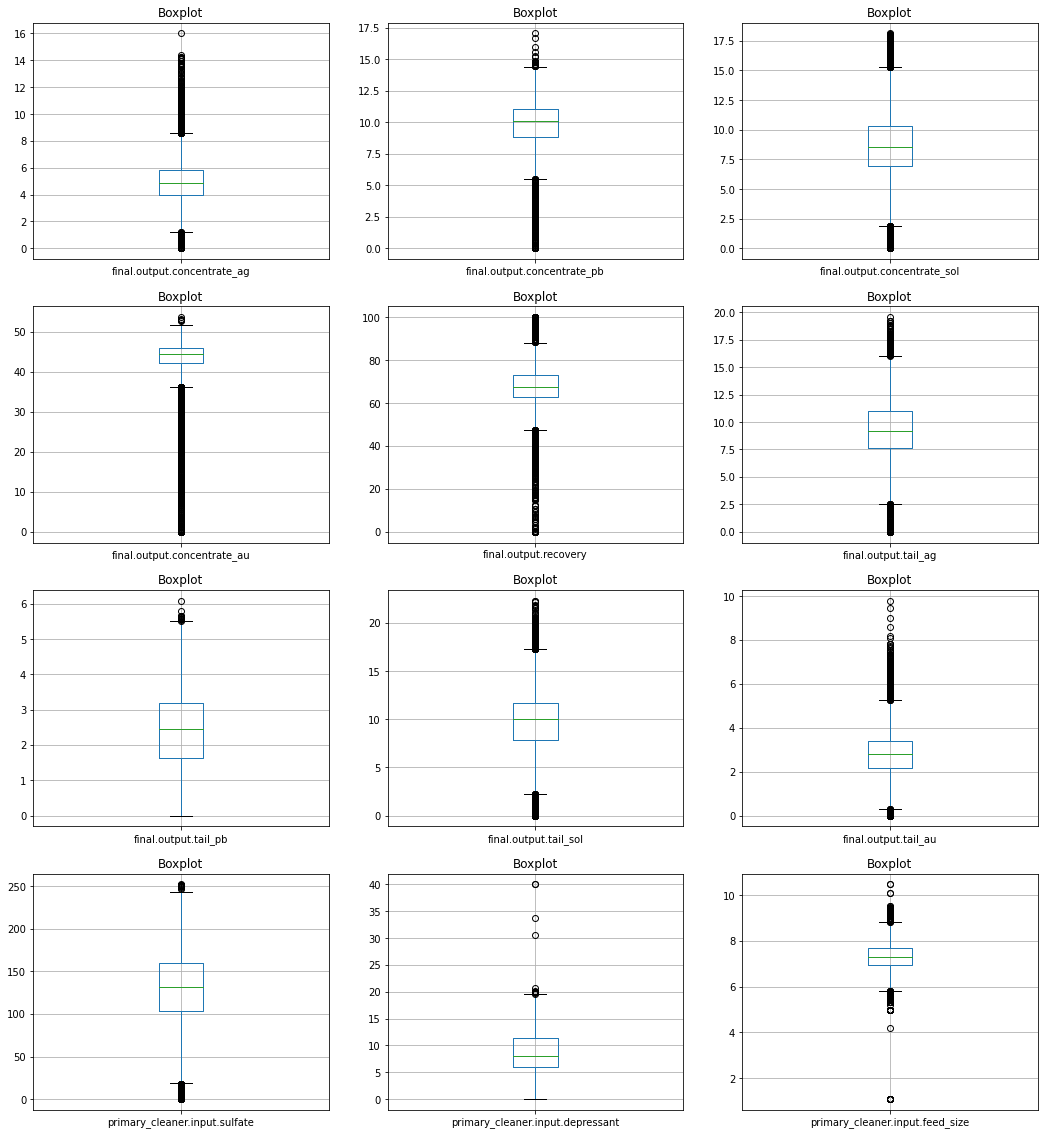

In [ ]:
plt.figure(figsize=(18, 20))
for i in range(1, 13):
    plt.subplot(4, 3, i)
    plt.title(f'Boxplot')
    df_train.boxplot(df_train.columns[i])
    i = i + 1
plt.show()

#### Test Dataframe<a id='test_dataframe'></a>

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [ ]:
dict(df_test.isna().sum().sort_values(ascending=False)/len(df_test)*100)

{'rougher.input.floatbank11_xanthate': 6.0280054644808745,
 'primary_cleaner.input.sulfate': 5.157103825136613,
 'primary_cleaner.input.depressant': 4.849726775956284,
 'rougher.input.floatbank10_sulfate': 4.3886612021857925,
 'primary_cleaner.input.xanthate': 2.8346994535519126,
 'rougher.input.floatbank10_xanthate': 2.1004098360655736,
 'rougher.input.feed_sol': 1.1441256830601094,
 'rougher.input.floatbank11_sulfate': 0.9392076502732241,
 'rougher.input.feed_rate': 0.6830601092896175,
 'secondary_cleaner.state.floatbank3_a_air': 0.5806010928961749,
 'secondary_cleaner.state.floatbank2_b_air': 0.3927595628415301,
 'rougher.input.feed_size': 0.3756830601092896,
 'secondary_cleaner.state.floatbank2_a_air': 0.34153005464480873,
 'rougher.state.floatbank10_a_air': 0.29030054644808745,
 'rougher.state.floatbank10_c_air': 0.29030054644808745,
 'rougher.state.floatbank10_d_air': 0.29030054644808745,
 'rougher.state.floatbank10_e_air': 0.29030054644808745,
 'rougher.state.floatbank10_b_air':

In [ ]:
df_test.duplicated().sum()

0

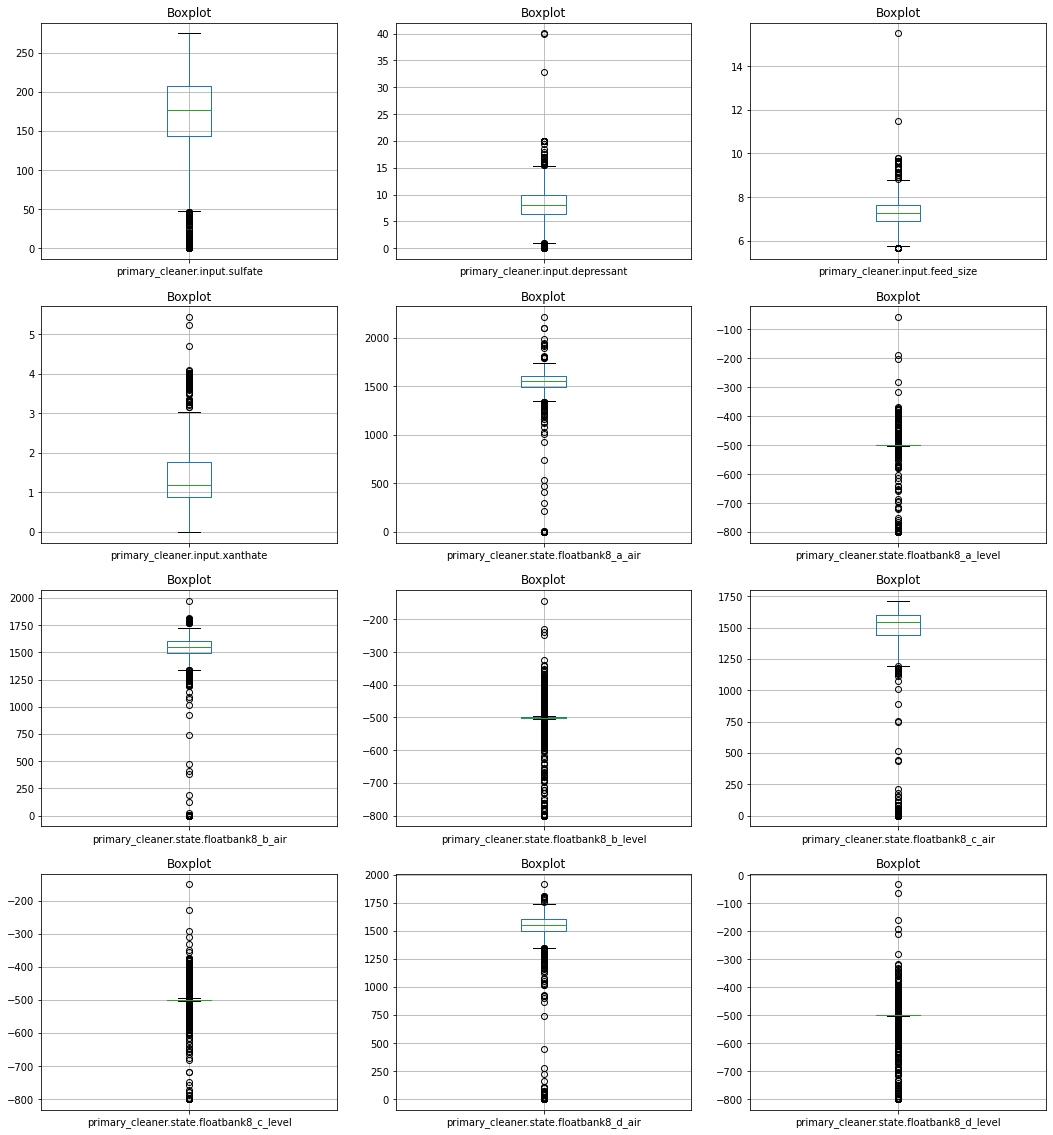

In [ ]:
plt.figure(figsize=(18, 20))
for i in range(1, 13):
    plt.subplot(4, 3, i)
    plt.title(f'Boxplot')
    df_test.boxplot(df_test.columns[i])
    i = i + 1
plt.show()

#### Full Dataframe<a id='full_dataframe'></a>

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [ ]:
dict(df_full.isna().sum().sort_values(ascending=False)/len(df_full)*100)

{'rougher.output.recovery': 13.730410283500616,
 'rougher.output.tail_ag': 12.048776192991724,
 'rougher.output.tail_au': 12.044374009508717,
 'rougher.output.tail_sol': 12.044374009508717,
 'rougher.input.floatbank11_xanthate': 9.93572812114809,
 'secondary_cleaner.output.tail_sol': 9.750836414861771,
 'final.output.recovery': 8.641486177143863,
 'rougher.calculation.au_pb_ratio': 7.162352526853319,
 'primary_cleaner.input.sulfate': 7.083113224159184,
 'primary_cleaner.input.depressant': 6.805775664729706,
 'rougher.input.floatbank10_sulfate': 5.727240711392851,
 'primary_cleaner.input.xanthate': 5.066913188941715,
 'primary_cleaner.output.concentrate_sol': 3.5129424194400425,
 'rougher.input.floatbank11_sulfate': 2.9846804014791335,
 'rougher.state.floatbank10_e_air': 2.7293537594646944,
 'rougher.input.feed_rate': 2.4344074661031874,
 'rougher.input.floatbank10_xanthate': 2.0646240535305513,
 'primary_cleaner.output.concentrate_pb': 1.9721782003873922,
 'rougher.input.feed_size': 1.

In [ ]:
df_full.duplicated().sum()

0

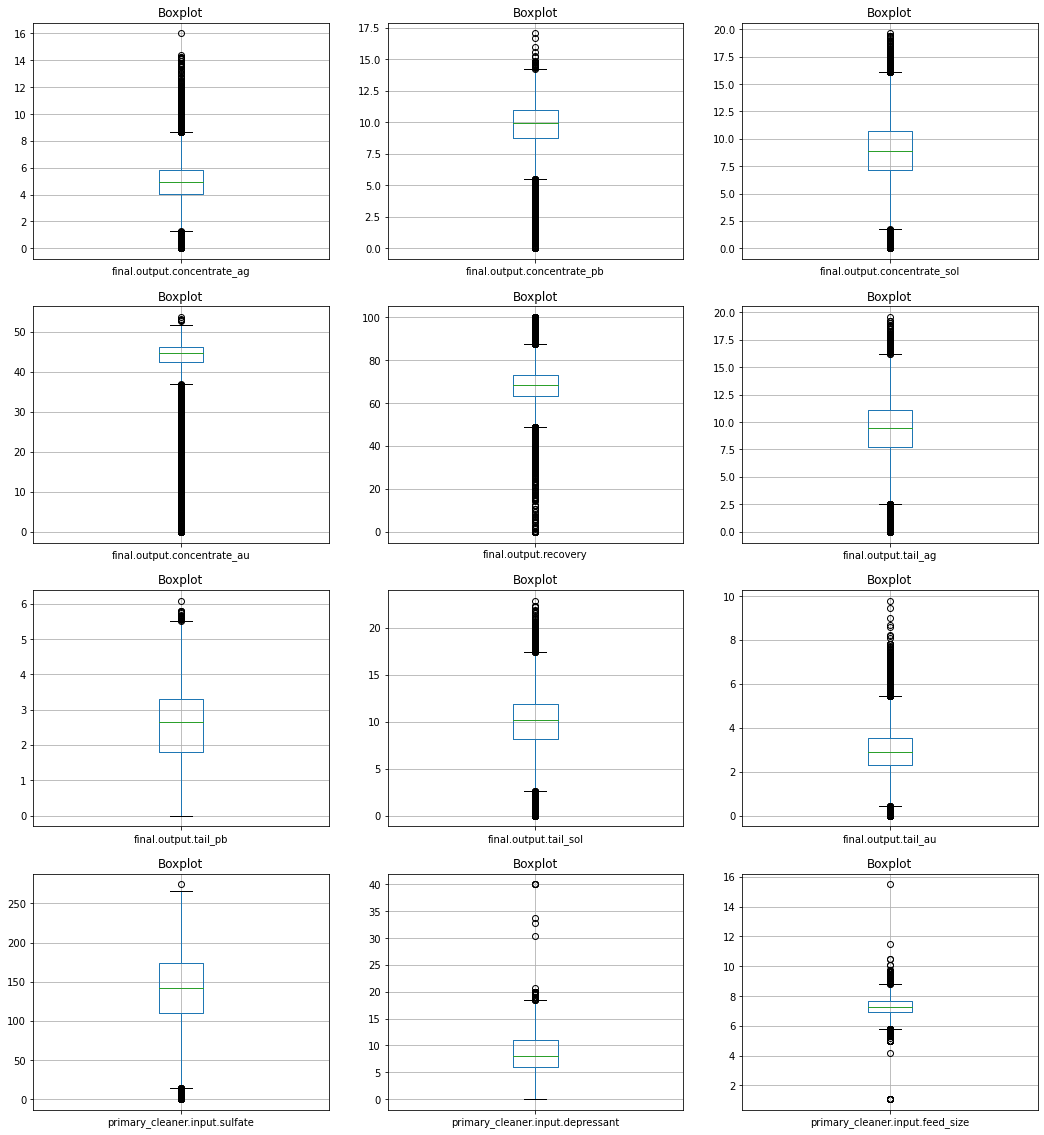

In [ ]:
plt.figure(figsize=(18, 20))
for i in range(1, 13):
    plt.subplot(4, 3, i)
    plt.title(f'Boxplot')
    df_full.boxplot(df_full.columns[i])
    i = i + 1
plt.show()

#### Initial Summary<a id='initial_summary'></a>

**Insights:**
1. The data types in all three dataframes are correct, so no changes needed.
2. Null values in each dataframe can be filled using the median value because there are outliers in each column.
3. In the test_dataframe, there are parameters that do not exist, namely the output and calculation types because these are the values that will be predicted by the created model.
4. There are 34 columns missing in test dataset, to simplify this project will use 2 values to become the target, namely  **rougher.output.recovery** and **final.output.recovery**
5. Some of the columns have missing values and the 2 target columns in the train dataset have missing values of up to 10% so here the missing values will be filled with their median values

### Find MAE for Recovery Calculation <a id='find_mae'></a>

In [ ]:
# create new dataframe for calculation purposes
df_formula = df_train.copy()

In [ ]:
df_formula[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']].isnull().sum()

rougher.output.concentrate_au      82
rougher.input.feed_au              83
rougher.output.tail_au           2249
dtype: int64

In [ ]:
# create new columns for calculation puporses
df_formula['numerator'] = df_formula['rougher.output.concentrate_au']*(df_formula['rougher.input.feed_au']
                                                                       - df_formula['rougher.output.tail_au'])

df_formula['denominator'] = df_formula['rougher.input.feed_au']*(df_formula['rougher.output.concentrate_au']
                                                                  - df_formula['rougher.output.tail_au'])

In [ ]:
df_formula[['numerator', 'denominator']].isnull().sum()

numerator      2250
denominator    2250
dtype: int64

In [ ]:
# fill null values to avoid error calc
df_formula['numerator'] = df_formula['numerator'].fillna(0)
df_formula['denominator'] = df_formula['denominator'].fillna(1)

In [ ]:
# create new columns for calculation puporses
df_formula['formula'] = df_formula['numerator'] / df_formula['denominator'] * 100

In [ ]:
answer = (df_formula['formula'] - df_formula['rougher.output.recovery']).abs().mean()
print('Difference between the expected value and measured value is {}'.format(answer))

Difference between the expected value and measured value is 9.303415616264301e-15


## Data Analyzation<a id='data_analyzation'></a>

### Concentration Changes in Each Purification Process<a id='purification_process'></a>

In [ ]:
steps_template = [
    'rougher.input.feed_{}',
    'rougher.output.concentrate_{}',
    'primary_cleaner.output.concentrate_{}',
    'final.output.concentrate_{}',
]

In [ ]:
# define function to simplfy iterative task
def plot_concentrate_progress(component):
    steps = [s.format(component) for s in steps_template]
    for step in steps:
        df_full[step].hist(alpha = 0.5, bins = 20)
    plt.legend(steps)

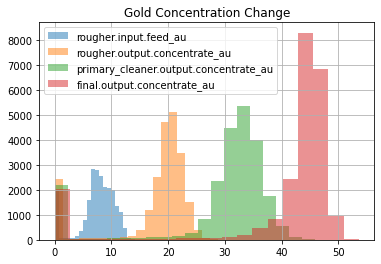

In [ ]:
plot_concentrate_progress('au')
plt.title('Gold Concentration Change');

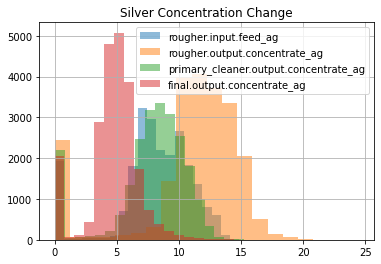

In [ ]:
plot_concentrate_progress('ag')
plt.title('Silver Concentration Change');

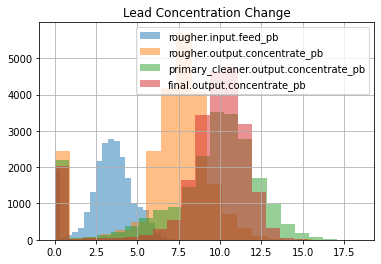

In [ ]:
plot_concentrate_progress('pb')
plt.title('Lead Concentration Change');

**Based on the visualization, it can be seen that:**

1. The concentration of gold tends to increase as the purification process get deeper
2. The concentration of silver increases in the flotation process, then decreases in the first and second purification process.
3. The concentration of lead increases in each purification process.

### Feed Particle Size Distributions<a id='particle_size_distributions'></a>

<AxesSubplot:ylabel='Density'>

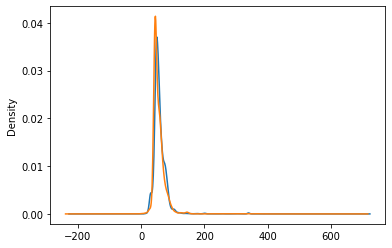

In [ ]:
# Plotting feed size
df_train['rougher.input.feed_size'].plot.kde()
df_test['rougher.input.feed_size'].plot.kde()

Here we can see that we get a fairly similar line, but there are outliers so let's look at the distribution without the outliers

In [ ]:
# define function to remove outliers and plot the distribution
def filter_outliers(series):
    return series[series.between(series.quantile(0.01), series.quantile(0.99))]

def compare_train_test_feature(feature):
    filter_outliers(df_train[feature]).plot.kde()
    filter_outliers(df_test[feature]).plot.kde()
    plt.legend(['train', 'test'])

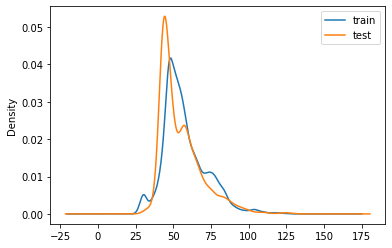

In [ ]:
compare_train_test_feature('rougher.input.feed_size')

From here we got similar distribution on train dan test dataset, so this will minor differtent will not affect the model

### Eliminate Anomalies<a id='eliminate_anomalies'></a>

<AxesSubplot:>

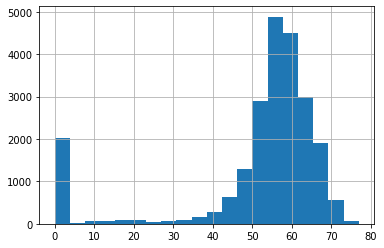

In [ ]:
features_input_concentrate = [
'rougher.input.feed_au',
'rougher.input.feed_ag',
'rougher.input.feed_pb',
'rougher.input.feed_sol',
]

df_full[features_input_concentrate].sum(1).hist(bins = 20)

<AxesSubplot:>

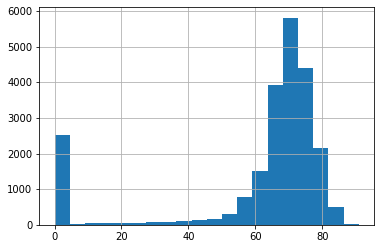

In [ ]:
features_rough_concentrate = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
]

df_full[features_rough_concentrate].sum(1).hist(bins=20)

<AxesSubplot:>

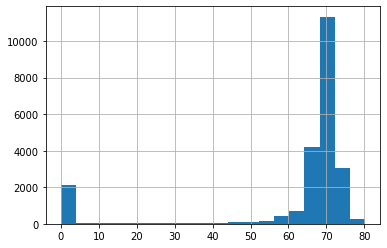

In [ ]:
features_final_concentrate = [
'final.output.concentrate_au',
'final.output.concentrate_ag',
'final.output.concentrate_pb',
'final.output.concentrate_sol',
]

df_full[features_final_concentrate].sum(1).hist(bins=20)

In [ ]:
THRESHOLD = 0.01

df_train = df_train[df_train[features_input_concentrate].sum(1) > THRESHOLD]
df_train = df_train[df_train[features_rough_concentrate].sum(1) > THRESHOLD]
df_train = df_train[df_train[features_final_concentrate].sum(1) > THRESHOLD]

print (df_train.shape)

df_full_test = df_full[df_full['date'].isin(df_test['date'])].reset_index(drop = True)
df_test = df_test[df_full_test[features_input_concentrate].sum(1) > THRESHOLD]
df_test = df_test[df_full_test[features_rough_concentrate].sum(1) > THRESHOLD]
df_test = df_test[df_full_test[features_final_concentrate].sum(1) > THRESHOLD]

print (df_test.shape)

(15096, 87)
(5278, 53)


### Fill Missing Value <a id='fill_missing_value'></a>

In [ ]:
# define columns used for training
columns_used = df_test.columns.values.tolist()
columns_used.append('rougher.output.recovery')
columns_used.append('final.output.recovery')

In [ ]:
# create dataframe for modeling purposes
df_train_fixed = df_train[columns_used]

In [ ]:
# excluding null data in target colum
df_train_fixed = df_train_fixed[df_train_fixed['rougher.output.recovery'].notnull()].reset_index(drop = True)
df_train_fixed = df_train_fixed[df_train_fixed['final.output.recovery'].notnull()].reset_index(drop = True)

In [ ]:
df_train_fixed.shape, df_test.shape

((13795, 55), (5278, 53))

In [ ]:
# create new variable for median calc to fill null values
df_full_fixed = pd.concat([df_train_fixed, df_test])

In [ ]:
df_full_fixed.isnull().mean().sort_values(ascending = False)

final.output.recovery                         0.276726
rougher.output.recovery                       0.276726
rougher.input.floatbank11_xanthate            0.022283
rougher.state.floatbank10_e_air               0.019556
secondary_cleaner.state.floatbank2_a_air      0.011325
rougher.input.feed_size                       0.007340
rougher.input.feed_pb                         0.005243
rougher.input.feed_sol                        0.005191
primary_cleaner.input.xanthate                0.005138
rougher.input.floatbank10_sulfate             0.001887
rougher.input.floatbank11_sulfate             0.001730
primary_cleaner.input.depressant              0.001573
primary_cleaner.input.sulfate                 0.001101
secondary_cleaner.state.floatbank2_b_air      0.001049
rougher.input.feed_rate                       0.000786
secondary_cleaner.state.floatbank3_a_air      0.000629
rougher.input.floatbank10_xanthate            0.000472
secondary_cleaner.state.floatbank4_a_air      0.000210
primary_cl

In [ ]:
# fill missing value (exclude the target dataframe)
for cols in df_full_fixed.isnull().mean().sort_values(ascending=False)[2:-2].index:
    median_cols = df_full_fixed[cols].median()
    df_full_fixed[cols] = df_full_fixed[cols].fillna(median_cols)

In [ ]:
# define variable for clean dataframe
df_test_final = df_full_fixed[df_full_fixed['rougher.output.recovery'].isnull()]
df_test_final = df_test_final.drop(columns = ['rougher.output.recovery', 'final.output.recovery'])

df_train_final = df_full_fixed[df_full_fixed['rougher.output.recovery'].notnull()].reset_index(drop = True)

## Build Model<a id='build_model'></a>

In [ ]:
# create variable for features and targets columns
features_columns = df_test_final.drop(columns = ['date']).columns.values
targets_columns = ['rougher.output.recovery', 'final.output.recovery']

In [ ]:
features_train = df_train_final[features_columns].reset_index(drop = True)
target_train = df_train_final[targets_columns].reset_index(drop = True)
target_train.columns = [0, 1]

In [ ]:
features_test = df_test_final[features_columns].reset_index(drop = True)
target_test = df_full[df_full['date'].isin(df_test_final['date'])][targets_columns].reset_index(drop = True)
target_test.columns = [0, 1]

In [ ]:
target_test[0]

0       89.993421
1       88.089657
2       88.412756
3       87.360133
4       83.236367
          ...    
5273    95.172585
5274    94.575036
5275    93.018138
5276    92.599042
5277    91.177695
Name: 0, Length: 5278, dtype: float64

In [ ]:
features_test.sample(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2766,196.641543,7.967537,7.02,1.000804,1301.801892,-499.465401,1298.522014,-501.044215,1295.712317,-500.826975,...,13.971125,-501.161606,12.983385,-402.677964,9.994013,-503.430757,7.998829,-500.184561,10.970701,-500.361924
4515,233.780051,12.001241,7.96,1.971023,1599.089175,-485.915456,1599.470834,-534.855219,1599.704196,-498.963600,...,16.996464,-499.703168,15.064444,-499.924747,10.954749,-502.445224,8.971020,-502.941297,15.988333,-500.311726
4300,231.632358,9.932195,6.57,3.890629,1601.938855,-499.476246,1598.263001,-482.306138,1528.593040,-514.330498,...,17.015718,-500.085954,14.898806,-499.916387,10.926903,-500.187676,9.007131,-500.069746,15.978064,-500.062972


In [ ]:
# define function for calculation metric
def smape(y_true, y_pred):
    error = (y_true - y_pred).abs()
    scale = (y_true.abs() + y_pred.abs()) / 2

    return (error / scale).mean() * 100

def smape_weighted(y_true, y_pred):
    rougher = smape(y_true[0], y_pred[0])
    final = smape(y_true[1], y_pred[1])

    return 0.25 * rougher + 0.75 * final

In [ ]:
# define function to cross validation model
def score_model(model, cv=4):
    scores = []

    for subtrain_index, valid_index in KFold(n_splits=cv).split(features_train):

        features_subtrain = features_train.loc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop=True)

        features_valid = features_train.loc[valid_index].reset_index(drop=True)
        target_valid = target_train.loc[valid_index].reset_index(drop=True)

        model.fit(features_subtrain, target_subtrain)
        pred_valid = pd.DataFrame(model.predict(features_valid))

        scores.append(smape_weighted(target_valid, pred_valid))

    return pd.Series(scores).mean()

### Ridge Model <a id='ridge_model'></a>

In [ ]:
def fit(features_train, target_train, features_test, target_test):
    param_grid = {
        'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
        'alpha': [0.01, 0.1, 1, 10, 100],
    }

    r = Ridge(random_state=12345)

    scorer = make_scorer(lambda target_test, target_pred:
                         (0.25 * ((target_test[0] - target_pred[0]).abs() / ((target_test[0].abs() + target_pred[0].abs()) / 2)).mean() +
                         0.75 * ((target_test[1] - target_pred[1]).abs() / ((target_test[1].abs() + target_pred[1].abs()) / 2)).mean()) * 100,
                         greater_is_better = False)

    grid = GridSearchCV(estimator=r, param_grid=param_grid, cv=5, scoring = scorer)

    grid.fit(features_train, target_train)

    best_params = grid.best_params_
    best_score = grid.best_score_
    target_pred = grid.predict(features_test)

    return best_params, best_score

In [ ]:
alphas = [0.01, 0.1, 1, 10, 100]
solvers = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

In [ ]:
best = []
for alpha in alphas:
    for solver in solvers:
        model = Ridge(solver = solver, alpha = alpha, random_state = 12345)
        score = score_model(model)
        best.append([solver, alpha, score])
        #print('R, alpha =', alpha, 'sovler=', solver, 'score =', score)

In [ ]:
best_params = pd.DataFrame(data = best, columns = ['solver', 'alpha', 'score'])

In [ ]:
best_params.sort_values(by = 'score').head(3)

,solver,alpha,score
28,sag,100.0,9.417111
22,sag,10.0,9.417418
16,sag,1.0,9.417479


Best hyperparameter for Ridge model:
- alpha = 100
- solver = 'sag'

### Random Forest Model <a id='random_forest_model'></a>

In [ ]:
def fit2(features_train, target_train, features_test, target_test):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'max_features' : ['sqrt']
    }

    r = RandomForestRegressor(random_state = 12345)

    scorer = make_scorer(smape_weighted, greater_is_better=False)

    grid = GridSearchCV(estimator=r, param_grid=param_grid, cv=5, scoring=scorer)

    grid.fit(features_train, target_train)

    best_params = grid.best_params_
    best_score = grid.best_score_

    return best_params, best_score

In [ ]:
max_depths = [5, 10]
n_estimators = [50, 100, 200]
max_features = ['sqrt', 'log2']

In [ ]:
best_2 = []
for max_depth in max_depths:
    for n_estimator in n_estimators:
        for max_feature in max_features:
            model = RandomForestRegressor(n_estimators = n_estimator, max_depth = max_depth,
                                          max_features = max_feature, random_state = 12345)
            score = score_model(model)
            best_2.append([max_depth, n_estimator, max_feature, score])
            #print('RF, max_depth =', max_depth, 'n_estimators =', n_estimator,'max_features =', max_feature,'score =', score)

In [ ]:
best_params_2 = pd.DataFrame(data = best_2, columns = ['max_depth', 'n_estimators', 'max_features', 'score'])

In [ ]:
best_params_2.sort_values(by = 'score').head(3)

,max_depth,n_estimators,max_features,score
11,10,200,log2,8.930128
1,5,50,log2,8.964528
5,5,200,log2,8.970076


Best hyperparameter for Random Forest model:
- max_depth = 10
- n_estimators = 200
- max_features = 'log2'

### Decision Tree Model <a id='decisiontree_model'></a>

In [ ]:
def fit3(features_train, target_train, features_test, target_test):
    param_grid = {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    r = DecisionTreeRegressor(random_state = 12345)

    scorer = make_scorer(smape_weighted, greater_is_better=False)

    grid = GridSearchCV(estimator=r, param_grid=param_grid, cv=5, scoring=scorer)

    grid.fit(features_train, target_train)

    best_params = grid.best_params_
    best_score = grid.best_score_

    return best_params, best_score

In [ ]:
max_depth = [3, 5, 10]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

In [ ]:
best_3 = []
for depth in max_depth:
    for sample_split in min_samples_split:
        for sample_leaf in min_samples_leaf:
            model = DecisionTreeRegressor(max_depth = depth, min_samples_split = sample_split,
                                          min_samples_leaf = sample_leaf, random_state=12345)
            score = score_model(model)
            best_3.append([depth, sample_split, sample_leaf, score])
            #print('DTR, max_depth =', depth, 'min_samples_split =', sample_split, 'min_samples_leaf =', sample_leaf, 'score =', score)

In [ ]:
best_params_3 = pd.DataFrame(data = best_3, columns = ['max_depth', 'sample_split', 'sample_leaf', 'score'])

In [ ]:
best_params_3.sort_values(by = 'score').head(3)

,max_depth,sample_split,sample_leaf,score
0,"[3, 5, 10]",2,1,9.655319
1,"[3, 5, 10]",2,2,9.655319
2,"[3, 5, 10]",2,4,9.655319


Best hyperparameter Decision Tree model:
- max_depth = 3
- min_samples_split = 2
- min_samples_leaf = 1

### Model Test <a id='model_test'></a>

In [ ]:
model = RandomForestRegressor(max_depth = 10, n_estimators = 200,
                              max_features = 'log2', random_state = 12345)
model.fit(features_train, target_train)
rfr_score = score_model(model)
print('rfr:', rfr_score)

In [ ]:
pred = pd.DataFrame(model.predict(features_train))
print('train:', smape_weighted(target_train, pred))

pred = pd.DataFrame(model.predict(features_test))
print('test:', smape_weighted(target_test, pred))

## Summary<a id='Summary'></a>

In this project, I created a model to predict the amount of gold that can be extracted from the available features. Here i create 3 model using Decision Tree, Random Forest and Ridge. Based on the analysis of 3 models, it was found that the Random Forest model performed better than others. By using max_depth = 10, n_estimators = 200, max_features = 'log2' for the hyperparameter the model will result 7.655 for smape value on the test dataset.